# **Milestone 1**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [4]:
hm=pd.read_csv("/Users/Xugao/Desktop/MIT_ADSP/elective_project/hmeq.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [5]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
# Display last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [8]:
# Check the shape of the data
# Remove ___________ and complete the code

data.shape

(5960, 13)

**Insights ________**

* There are 5960 rows and 13 columns.

### **Check the data types of the columns**

In [9]:
# Check info of the data
# Remove ___________ and complete the code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights ______________**


* all the columns have non-null values
* except 'reason','job',' the rest columns calues are numerical

### **Check for missing values**

In [10]:
# Analyse missing values - Hint: use isnull() function
print(data.isnull().sum().sort_values(ascending=False))

DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
LOAN          0
BAD           0
dtype: int64


<AxesSubplot:>

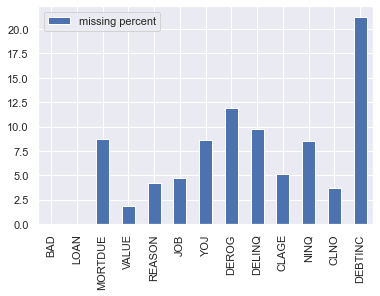

In [12]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset

percent_missing = data.isnull().sum()*100/len(data)

missing_value_df = pd.DataFrame({'columns':data.columns,'missing percent':percent_missing})
missing_value_df.plot(kind='bar')

**Insights ________**

* the top 3 percentage of missing value columns are: debting, derog,delinq.
* the columns 'bad' and 'loan' has no missing data.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [13]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [14]:
cols

['REASON', 'JOB', 'BAD']

In [15]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [16]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.6 KB


### **Analyze Summary Statistics of the dataset**

In [19]:
# Analyze the summary statistics for numerical variables

data.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


**Insights ______________**
* the mean loan amount is 18608
* 25 % of applicants' loan amount is less than 11000, and 75% of applicants' loan amount is less than 23300
* the mean mortdue is 73760
* the mean value is 101776 and 25% people owning property value less than 66075
* the mean year of job is 9 years, and 75% of applicants 'working year is range from 0 to 13
* the mean times of major derogatory reports is around 3, while max number is 10
* the mean number of delinquent credit lines is less than1
* 75% of people has less than 232 months for the oldest credit line
* the mean times of recent credit inquiries is around 1
*  75% of people less than 26 for exsting credit lines
* the mean debt-to-income ratio is 34 and min ratio is less 52% while the max ratio is 203%

In [1]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include=['category']).T

NameError: name 'data' is not defined

**Insights _____________**
* there is no missing value in column"BAD", and there 2 category in it, the most frequent catogary is 0 apprearing 4771 times
* there are 6 types in JOB columns, most frequent catogary is "Other" that appears 2388 times.
* there are 2 reasons, most frequent reaon is Debtcon.

**Let's look at the unique values in all the categorical variables**

In [22]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values', cols_cat.nunique())

Unique values BAD       2
REASON    2
JOB       6
dtype: int64
Unique values BAD       2
REASON    2
JOB       6
dtype: int64
Unique values BAD       2
REASON    2
JOB       6
dtype: int64


### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [23]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

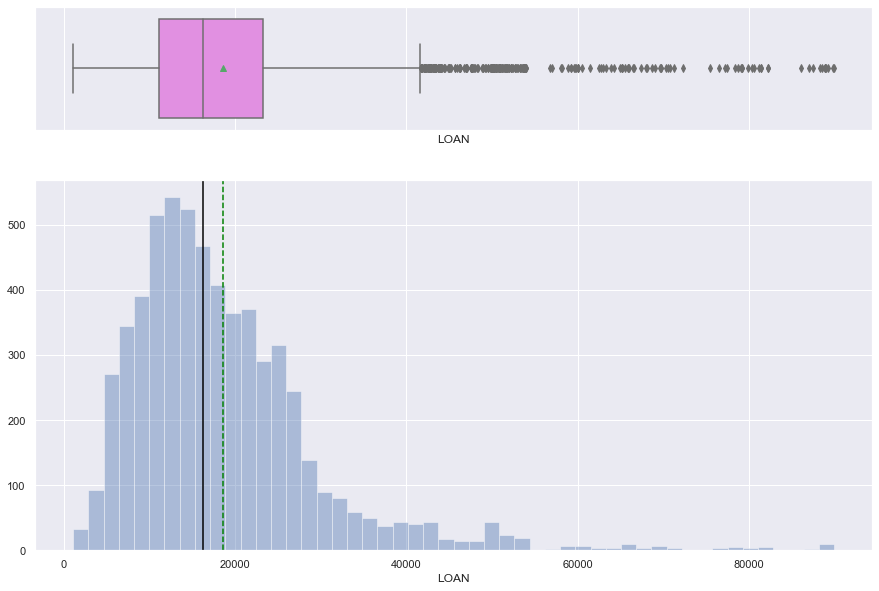

In [25]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights __________**
* the loan amount shows normal distribution to some extent
* the mean of loan amount is around 20000.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

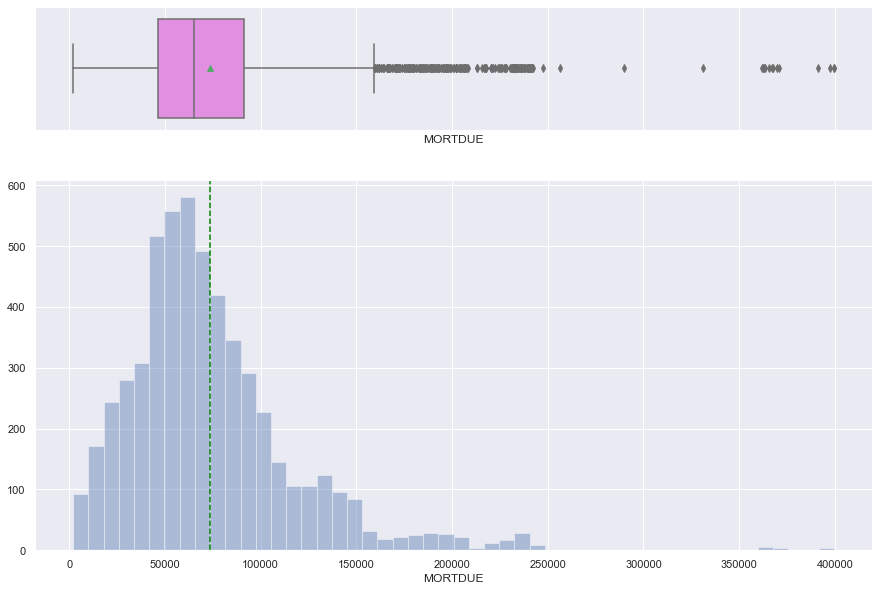

In [26]:
histogram_boxplot(data['MORTDUE'])

* the amount due on the exsting mortage is centered 50000-60000, the mean amount is aroung 70000.
* 75% mortage due amount is less than 100000.

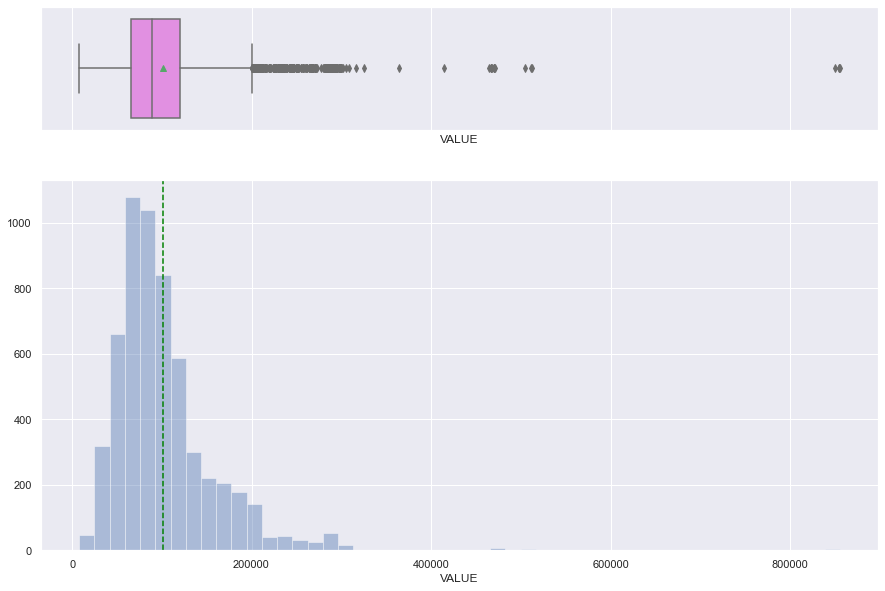

In [27]:
histogram_boxplot(data['VALUE'])

* the mean of current value of the property is around 100000, and 75% of people 
  current value of property is around under 100000.
* there are some outliners value above 200000.

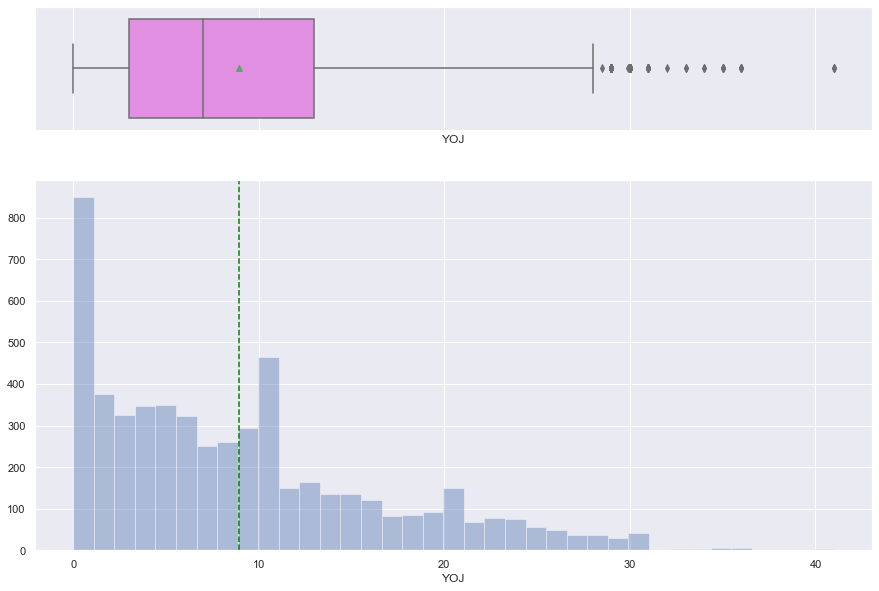

In [28]:
histogram_boxplot(data['YOJ'])

* the mean year of job is around 9 years.
* 50% of peoples' working years is ranged from 2-14 years
* there are few outliners more than 30 years

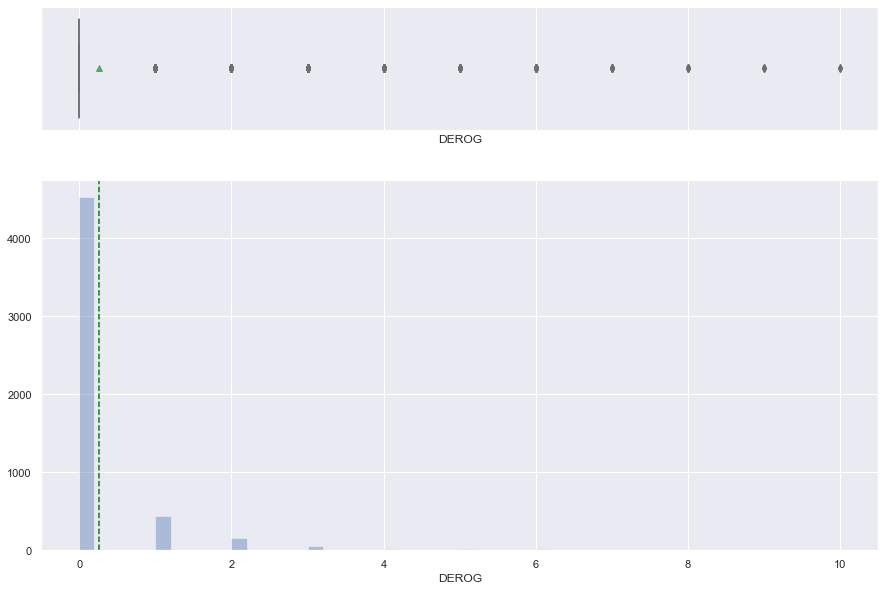

In [30]:
histogram_boxplot(data['DEROG'])

* the mean of number of major derogatory reports is less than 1

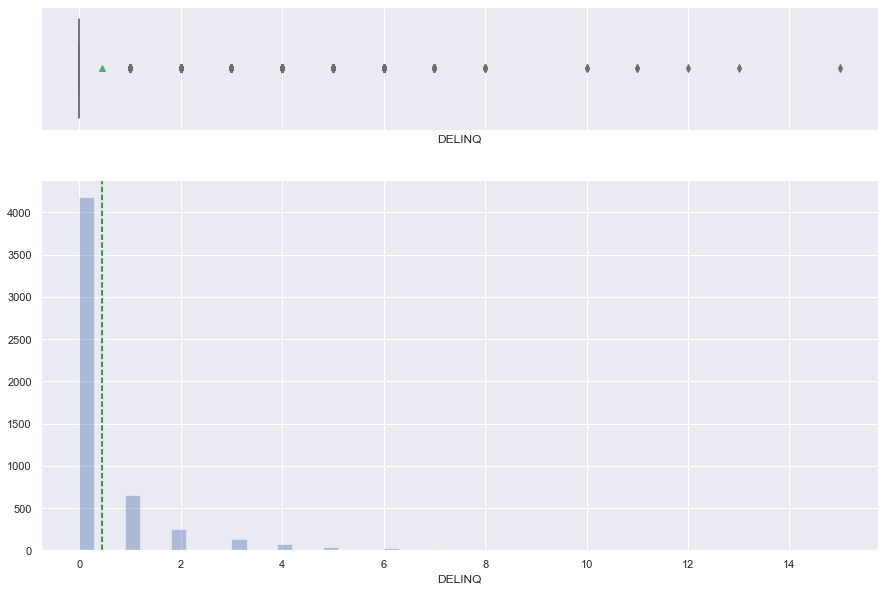

In [31]:
histogram_boxplot(data['DELINQ'])

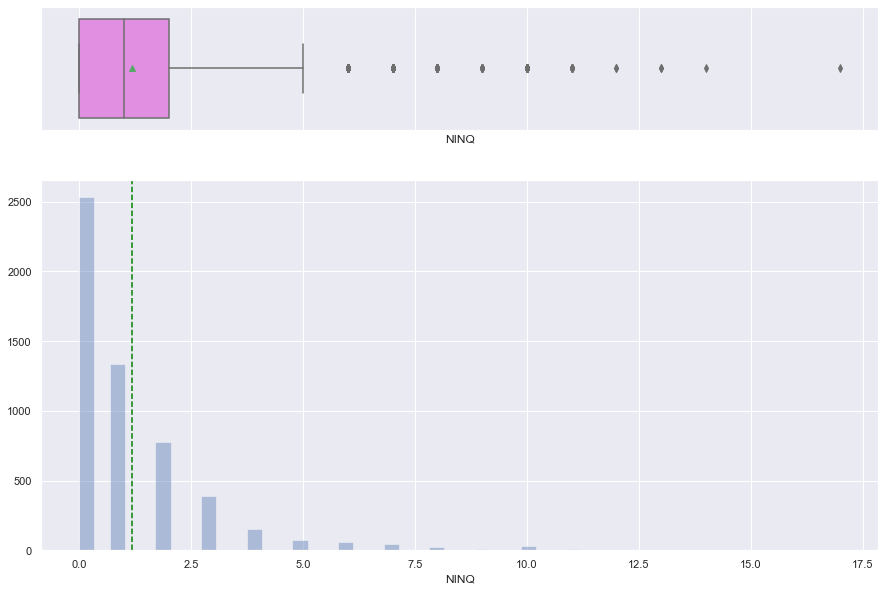

In [32]:
histogram_boxplot(data['NINQ'])

* the mean number of delinquent credit lines is less than 1
* the mean number of credit inquiries is around 1.
* 75% people does recent inquires less than twice.

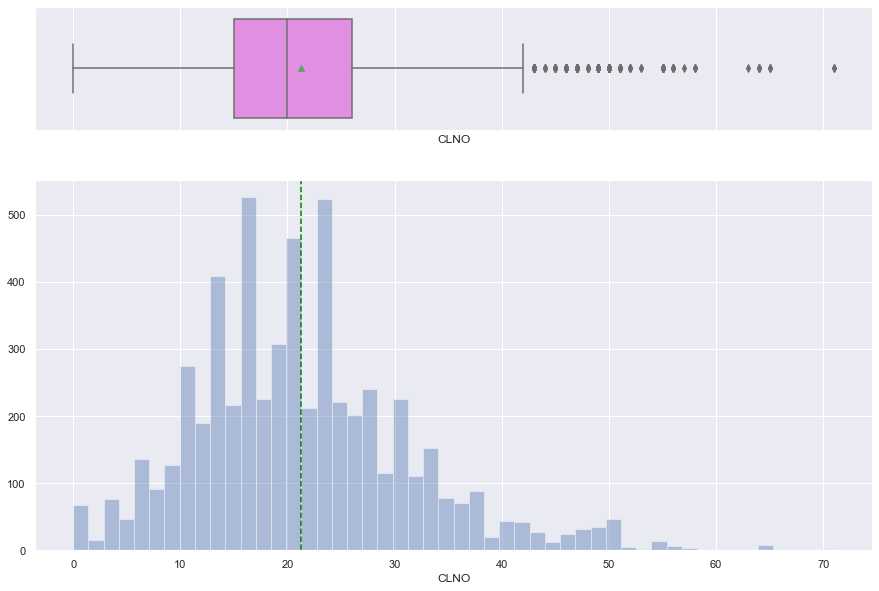

In [33]:
histogram_boxplot(data['CLNO'])

* the mean number of existing credit lines is around 20
* 75% people have less than 25 existing credit lines.
* there are some outliners more 40 lines

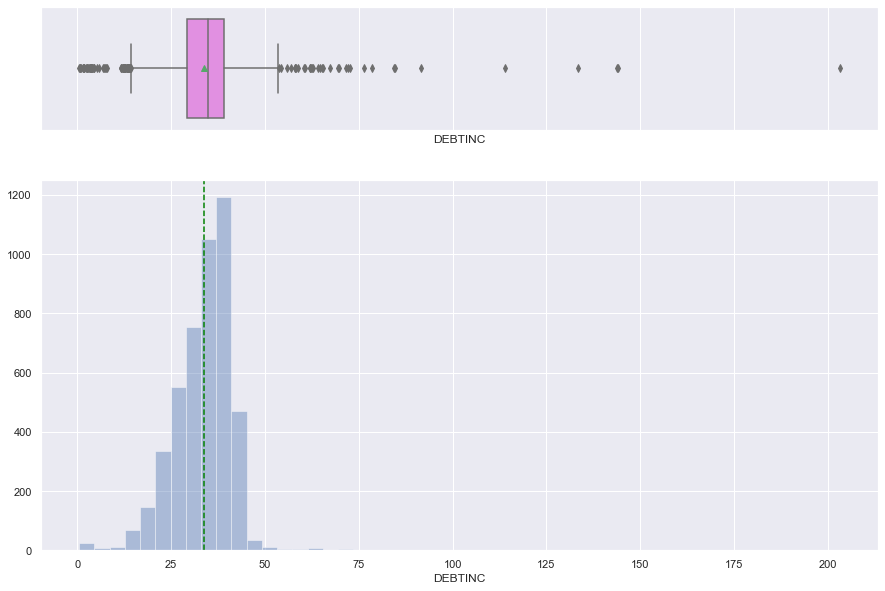

In [35]:
histogram_boxplot(data['DEBTINC'])

 * the mean of debt_income ratio is around 30%
 * 75% of people have less than 40% debt_income ratio
 * 25% of people have less than 30% debt_income ratio


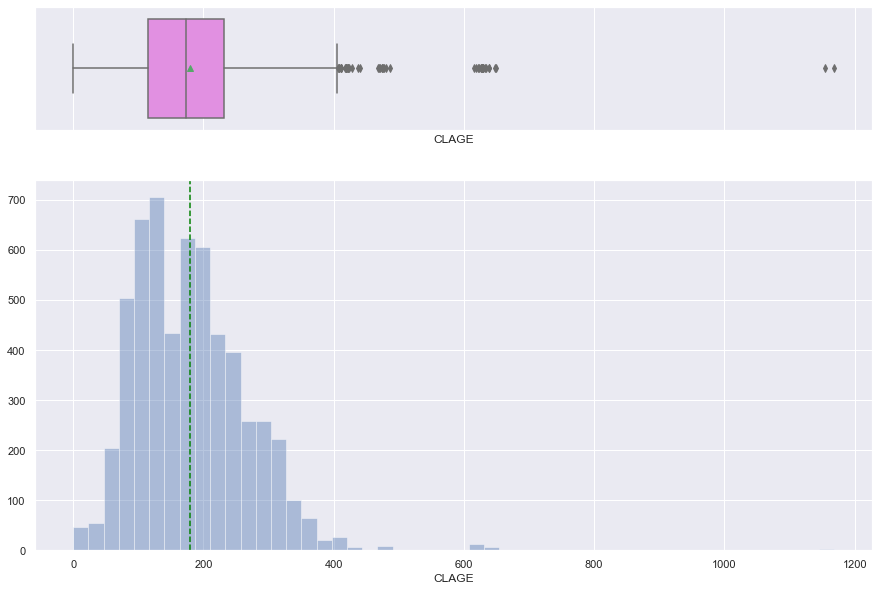

In [36]:
histogram_boxplot(data['CLAGE'])

**Insights ____________**
* the mean of the oldest credit line is around 200 months

### **2. Univariate Analysis - Categorical Data**

In [37]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

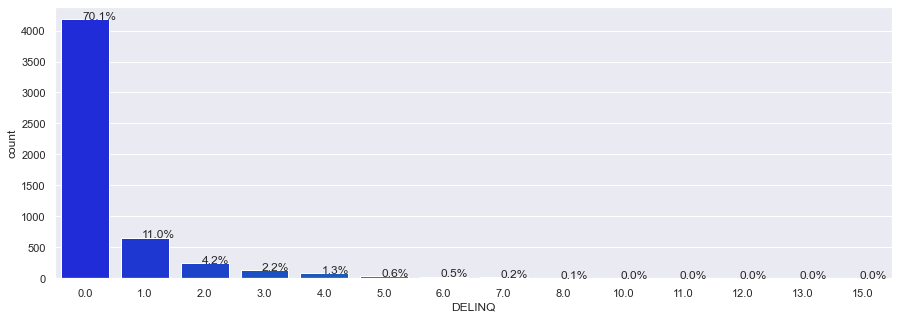

In [38]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights ________**
* 70% number of delinquent credit lines is 0, which shows most of people make the required payment on time.
* and 11% have once of delinquent credit lines


#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

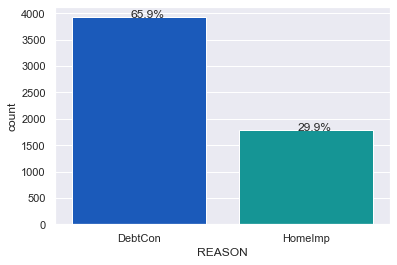

In [41]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

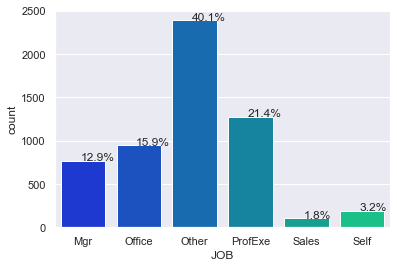

In [42]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data["JOB"], palette='winter')
perc_on_bar(ax,data["JOB"])

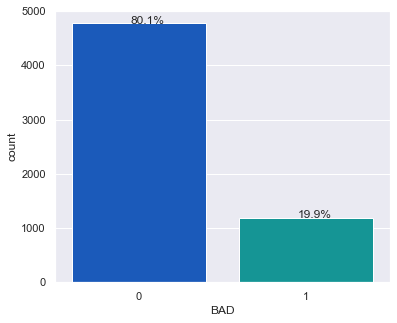

In [43]:
plt.figure(figsize=(6,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

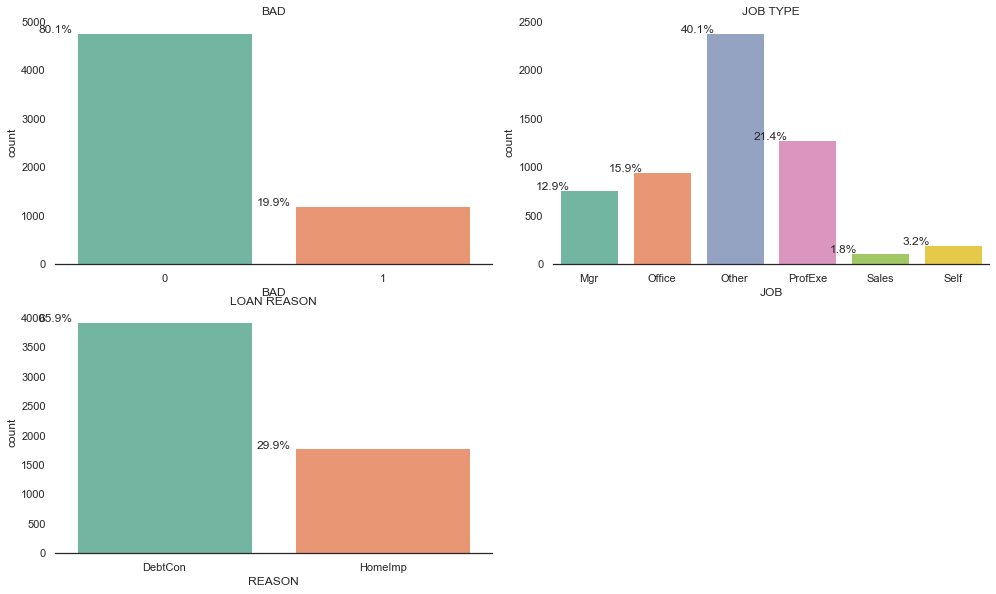

In [44]:
# making a list categorical variables
cat_columns = ['BAD','JOB','REASON']

title = ['BAD','JOB TYPE','LOAN REASON']

plt.figure(figsize=(14,20))
sns.set_theme(style="white")

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = data[variable].value_counts(ascending=False).index
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=data[variable], data=data)
                     sns.despine(top=True, right=True, left=True)
                     
                     for p in ax.patches:
                            percentage = '{:.1f}%'.format(100*p.get_height()/len(data[variable]))
                            x = p.get_x() + p.get_width() / 2-0.5
                            y = p.get_y() + p.get_height()
                            plt.annotate(percentage, (x, y), ha='center')
                            
                     plt.tight_layout()
                     plt.title(title[i].upper())

* 80% clients shows defaulted on loan and only around 20% paid on time
* based on job type, the top 3 job clients are 'other','proexe','office'
* the sales account for least proportion, which make sense as income of sale is unstable always
* 66% apply for loan in order to debt consolidation and 30% appply for home improvement.

<AxesSubplot:xlabel='JOB'>

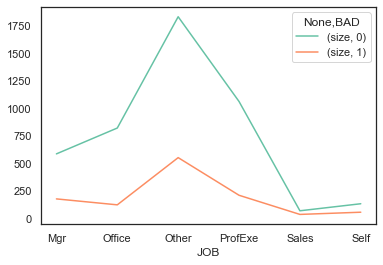

In [343]:
data.groupby(['JOB','BAD'])['LOAN'].agg({'size'}).unstack().plot()

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

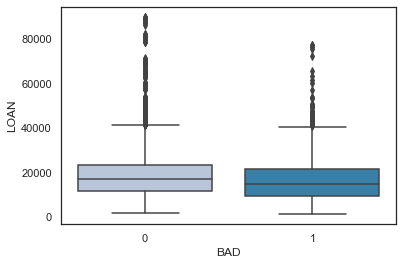

In [344]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

* both defaulted and loan repaid, amount of approved is around 10000 to 20000.

<AxesSubplot:xlabel='DELINQ', ylabel='DEROG'>

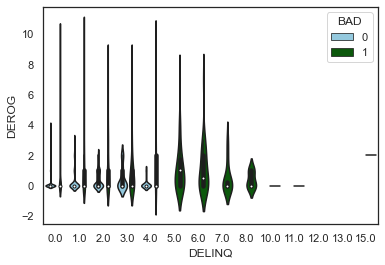

In [345]:
sns.violinplot(x="DELINQ", y = "DEROG", data=data, hue="BAD", palette = ["skyblue","darkgreen"],alpha=0.5)

* the general trend is the bigger the delinq is , the more probability is bad 1, we can see after 5, there are
all bad 1
* for delinq 0-4, the median of derog is all 0, which means there is no major derogatory
reports, as result it loan repaid.

<AxesSubplot:ylabel='REASON'>

<Figure size 720x720 with 0 Axes>

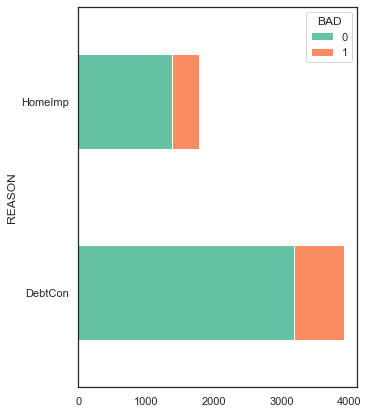

In [346]:
plt.figure(figsize=(10,10))

pd.crosstab(index=data['REASON'], columns=data['BAD'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(5,7))

* the numbers for home improvement reason is around half of that of debt consolidation
* the around 1500 of reason homelmp repaid loan and almost 1/3 amounts defaulted on loan
* for reason debet consolodation loan, loan repaid number almost 1/4 of amount of loan repaid

<AxesSubplot:ylabel='JOB'>

<Figure size 720x720 with 0 Axes>

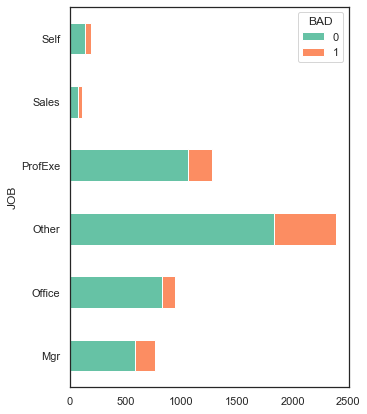

In [347]:
plt.figure(figsize=(10,10))

pd.crosstab(index=data['JOB'], columns=data['BAD'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(5,7))

* the number of other job type is most, and around 3/4 is repaid loan.
* the next 2 is proexe and office, the repaid loan ratio of all loans for these two is lower than 'other'
* 'sales' and 'self' acounts for least proportion of all 6 types as the income for those groups is not stable sometimes

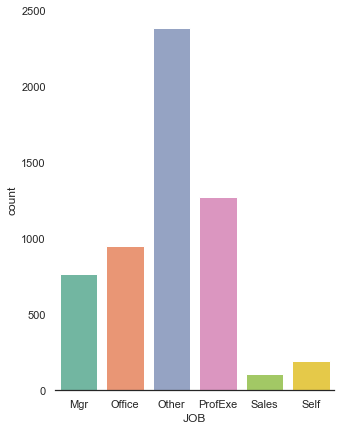

In [348]:
plt.figure(figsize=(5,7))
sns.countplot(data=data, x=data['JOB'])
sns.despine(top=True,right=True,left=True)

* top 3 job type for clients are 'other, proexe,office'

In [349]:
data.groupby('BAD')['MORTDUE'].mean()

BAD
0    74829.249055
1    69460.452973
Name: MORTDUE, dtype: float64

<AxesSubplot:xlabel='BAD'>

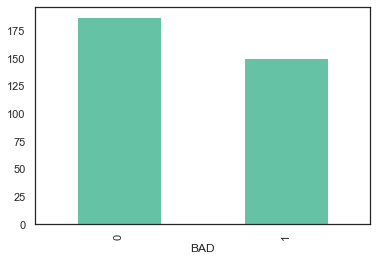

In [350]:
data.groupby('BAD')['CLAGE'].mean().plot(kind="bar")

* the mean month for oldest credit line is 175 month for loan repaid groups, which is higher higher than
  that of defaulted loan groups

<AxesSubplot:xlabel='BAD'>

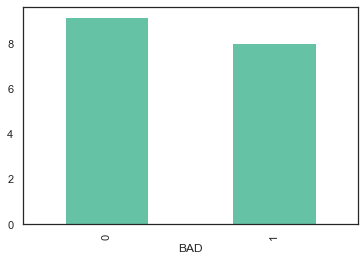

In [351]:
data.groupby('BAD')['YOJ'].mean().plot(kind="bar")

<AxesSubplot:xlabel='BAD'>

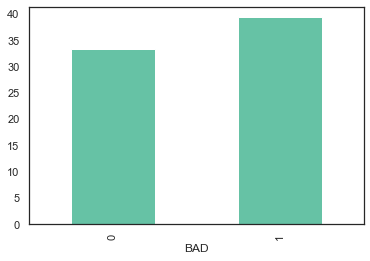

In [352]:
#data.groupby('BAD')['DEBTINC'].max().plot(kind="bar")
data.groupby('BAD')['DEBTINC'].mean().plot(kind="bar")

<AxesSubplot:xlabel='REASON', ylabel='LOAN'>

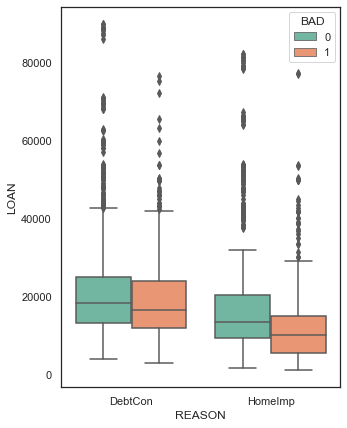

In [353]:
plt.figure(figsize=(5,7))
sns.boxplot(x="REASON",
                y="LOAN",
                hue="BAD",
                data=data)

* the mean month for oldest credit line is 175 month for loan repaid groups, which is higher higher than
  that of defaulted loan groups
* the mean years at presen works of repaid groups is higher than defualted loans group
* the debt-income ratio of repaid clients are lower than that of defaulted clients
* 50% debt consolidation loan is less than 20000 , and there are few outliners more than 40000
* in general the home improvement loan amount is less than debt consolidatio loan, 
* 50% of dafulted loan of debtcon is less than around 18000, and 50% of homlmp loan is less than around 10000.

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

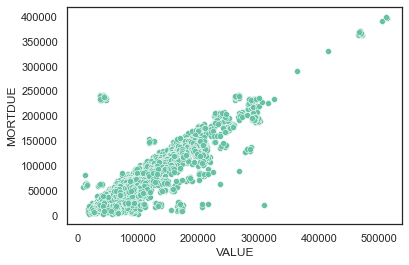

In [354]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="BLUE")

<AxesSubplot:xlabel='LOAN', ylabel='MORTDUE'>

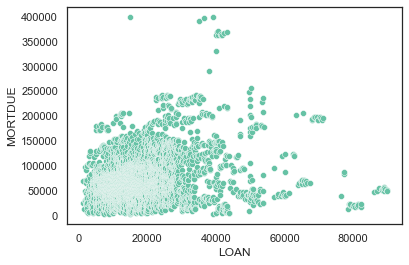

In [355]:
sns.scatterplot(data['LOAN'],data['MORTDUE'],palette="PuBu")

<AxesSubplot:xlabel='LOAN', ylabel='YOJ'>

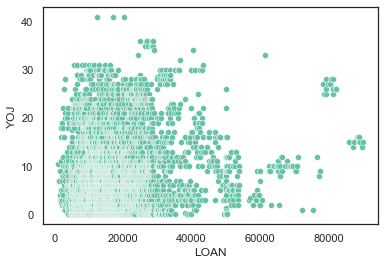

In [356]:
sns.scatterplot(data['LOAN'],data['YOJ'],palette="PuBu")

<AxesSubplot:xlabel='DEROG', ylabel='LOAN'>

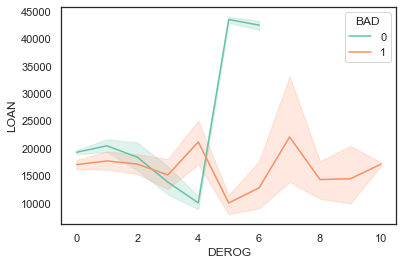

In [357]:
sns.lineplot(data=data, x="DEROG", y="LOAN", hue="BAD")

<AxesSubplot:xlabel='NINQ', ylabel='LOAN'>

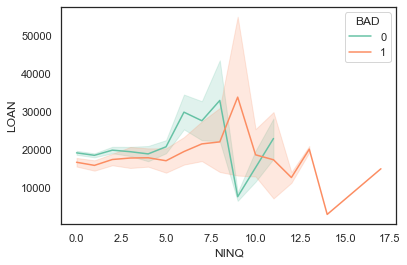

In [358]:
sns.lineplot(data=data,x= "NINQ", y="LOAN", hue="BAD")

<AxesSubplot:xlabel='DEBTINC', ylabel='LOAN'>

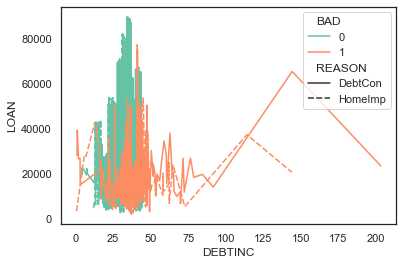

In [359]:
sns.lineplot(data=data, x="DEBTINC", y="LOAN", hue="BAD", style="REASON")

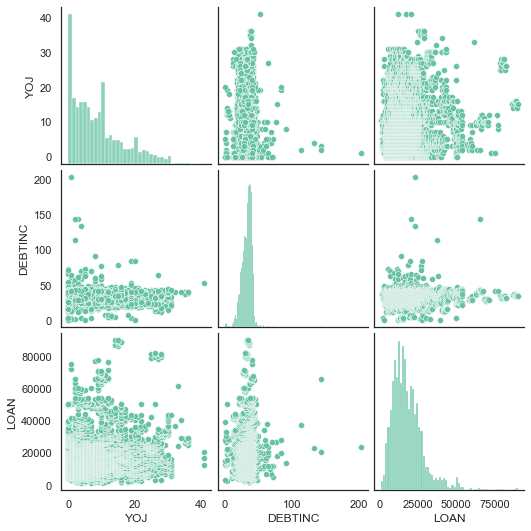

In [360]:
sns.pairplot(data = data, vars=['YOJ','DEBTINC','LOAN'])

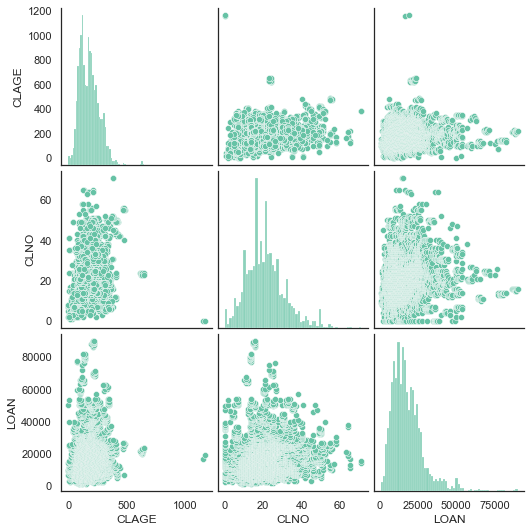

In [361]:
sns.pairplot(data=data, vars=['CLAGE','CLNO','LOAN'])

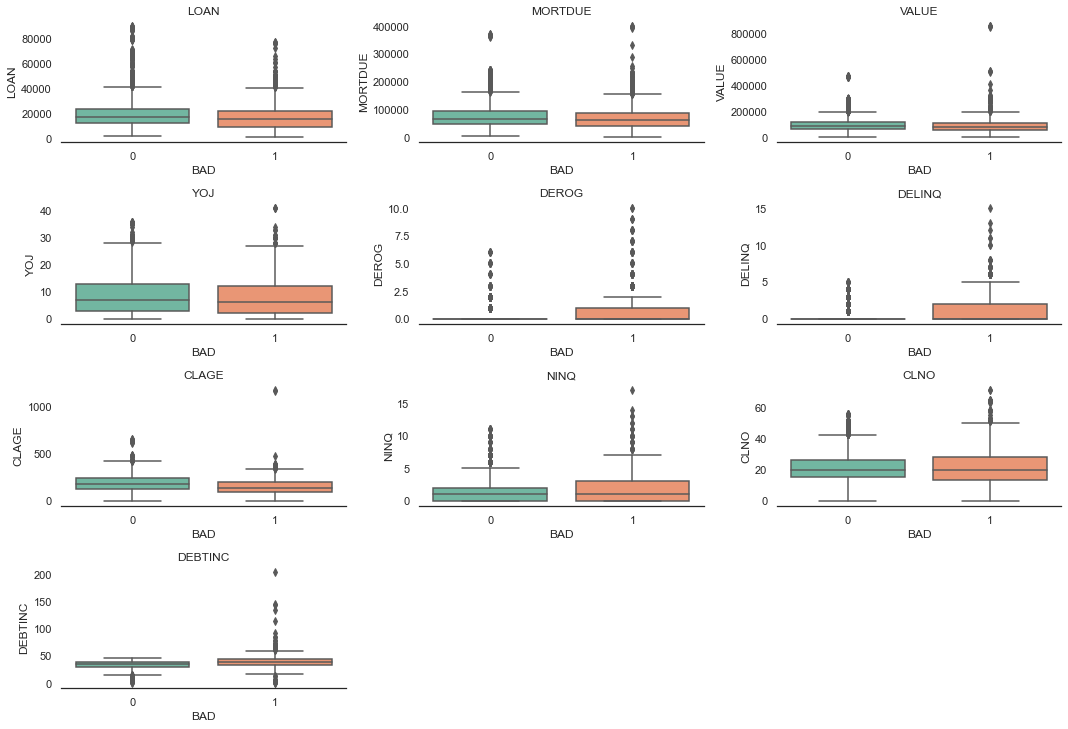

In [362]:
numeric_columns = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2",8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='BAD', y=data[variable], data=data)
        sns.despine(top=True,right=True,left=True)
        
        
        plt.tight_layout()
        plt.title(variable.upper())
        

**Insights: _____**

* 75% load repaid clients' amount of loan approved is less than 20000
* 25% defaulted clients amount of loan approved is less than 10000, and 50% of them
  get 10000 around for approved loan
* for defaulted loan clients, the mean of amount due on the exsting mortgage is 50000, which is almost the 
  same as that for loan repaid clients
* 50% repaid loan clints own around 100000 value property, which is as almost same as that of defaulted loan clients
* for repaid loan clients, the mean of years in current job is around 6 years, which is more than the mean years for defaulted loan clients 
* for repaid loan clients, almost no derog record, it indicates that no derog record is potively impact wether can pay loan on time next time, while for defaulted clients, 75% clients has less than once
* for repaid loan clients, almost no delinquent credit line record, it indicates that delinquent record is potively impact wether can pay loan on time next time, while for 25% less than once for delinquent credit
* the mean age of the oldest credit line is almost same for defaulted loan and repaid loan clients, which means 
 holding long month credit line does not mean repaid on time.
* them mean number of recent credit inquries for both clients group is similiar, which is around 2.
* 50% of clients for both groups own around 20 exsiting credit lines.
* the debt-income ratio for 75% loan repaid clients is less than 30%, while 75% loan defualted clients is less than 50% with some outliners

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [363]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


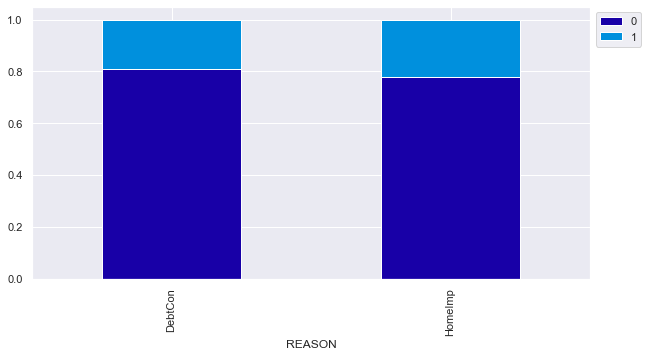

In [364]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD


BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


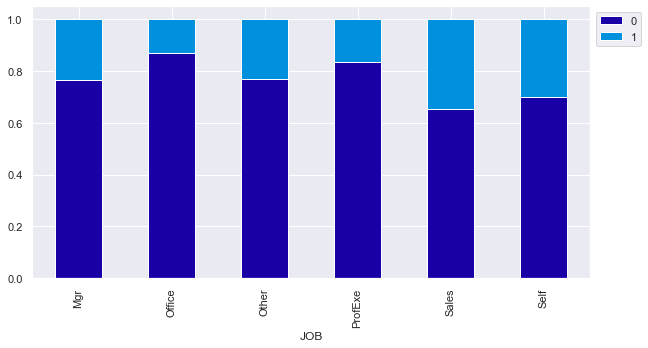

In [365]:
stacked_plot(data['JOB'])

**Insights ___________________**

* for debtcon reason, 80% of clients repaid loan, only 20% defaulted loan
* for homedevp reason, 80% of clients repaid loan, only 30% defaulted loan
* for job type, the most proportion of repaid loan clienst are office, proexe, other.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

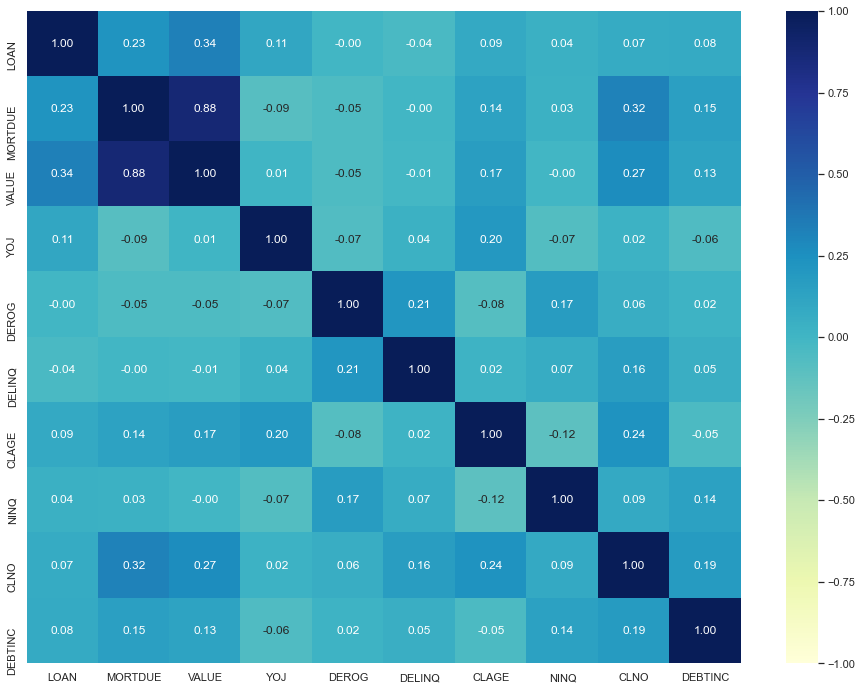

In [366]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns


corr = data[numerical_col].corr()

plt.figure(figsize=(16,12))
sns.heatmap(data[numerical_col].corr(),annot=True,cmap='YlGnBu',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

* value and mortdue are strong postively related
* year of current work and mortdue are negatively related
* loan amount approved and value are positively related
* derog and value are negativly related
* deblinq and clinq are little positively related
* Clage is negatively related iwth derog
* debtinc is positively related with mortdue and value seperatively

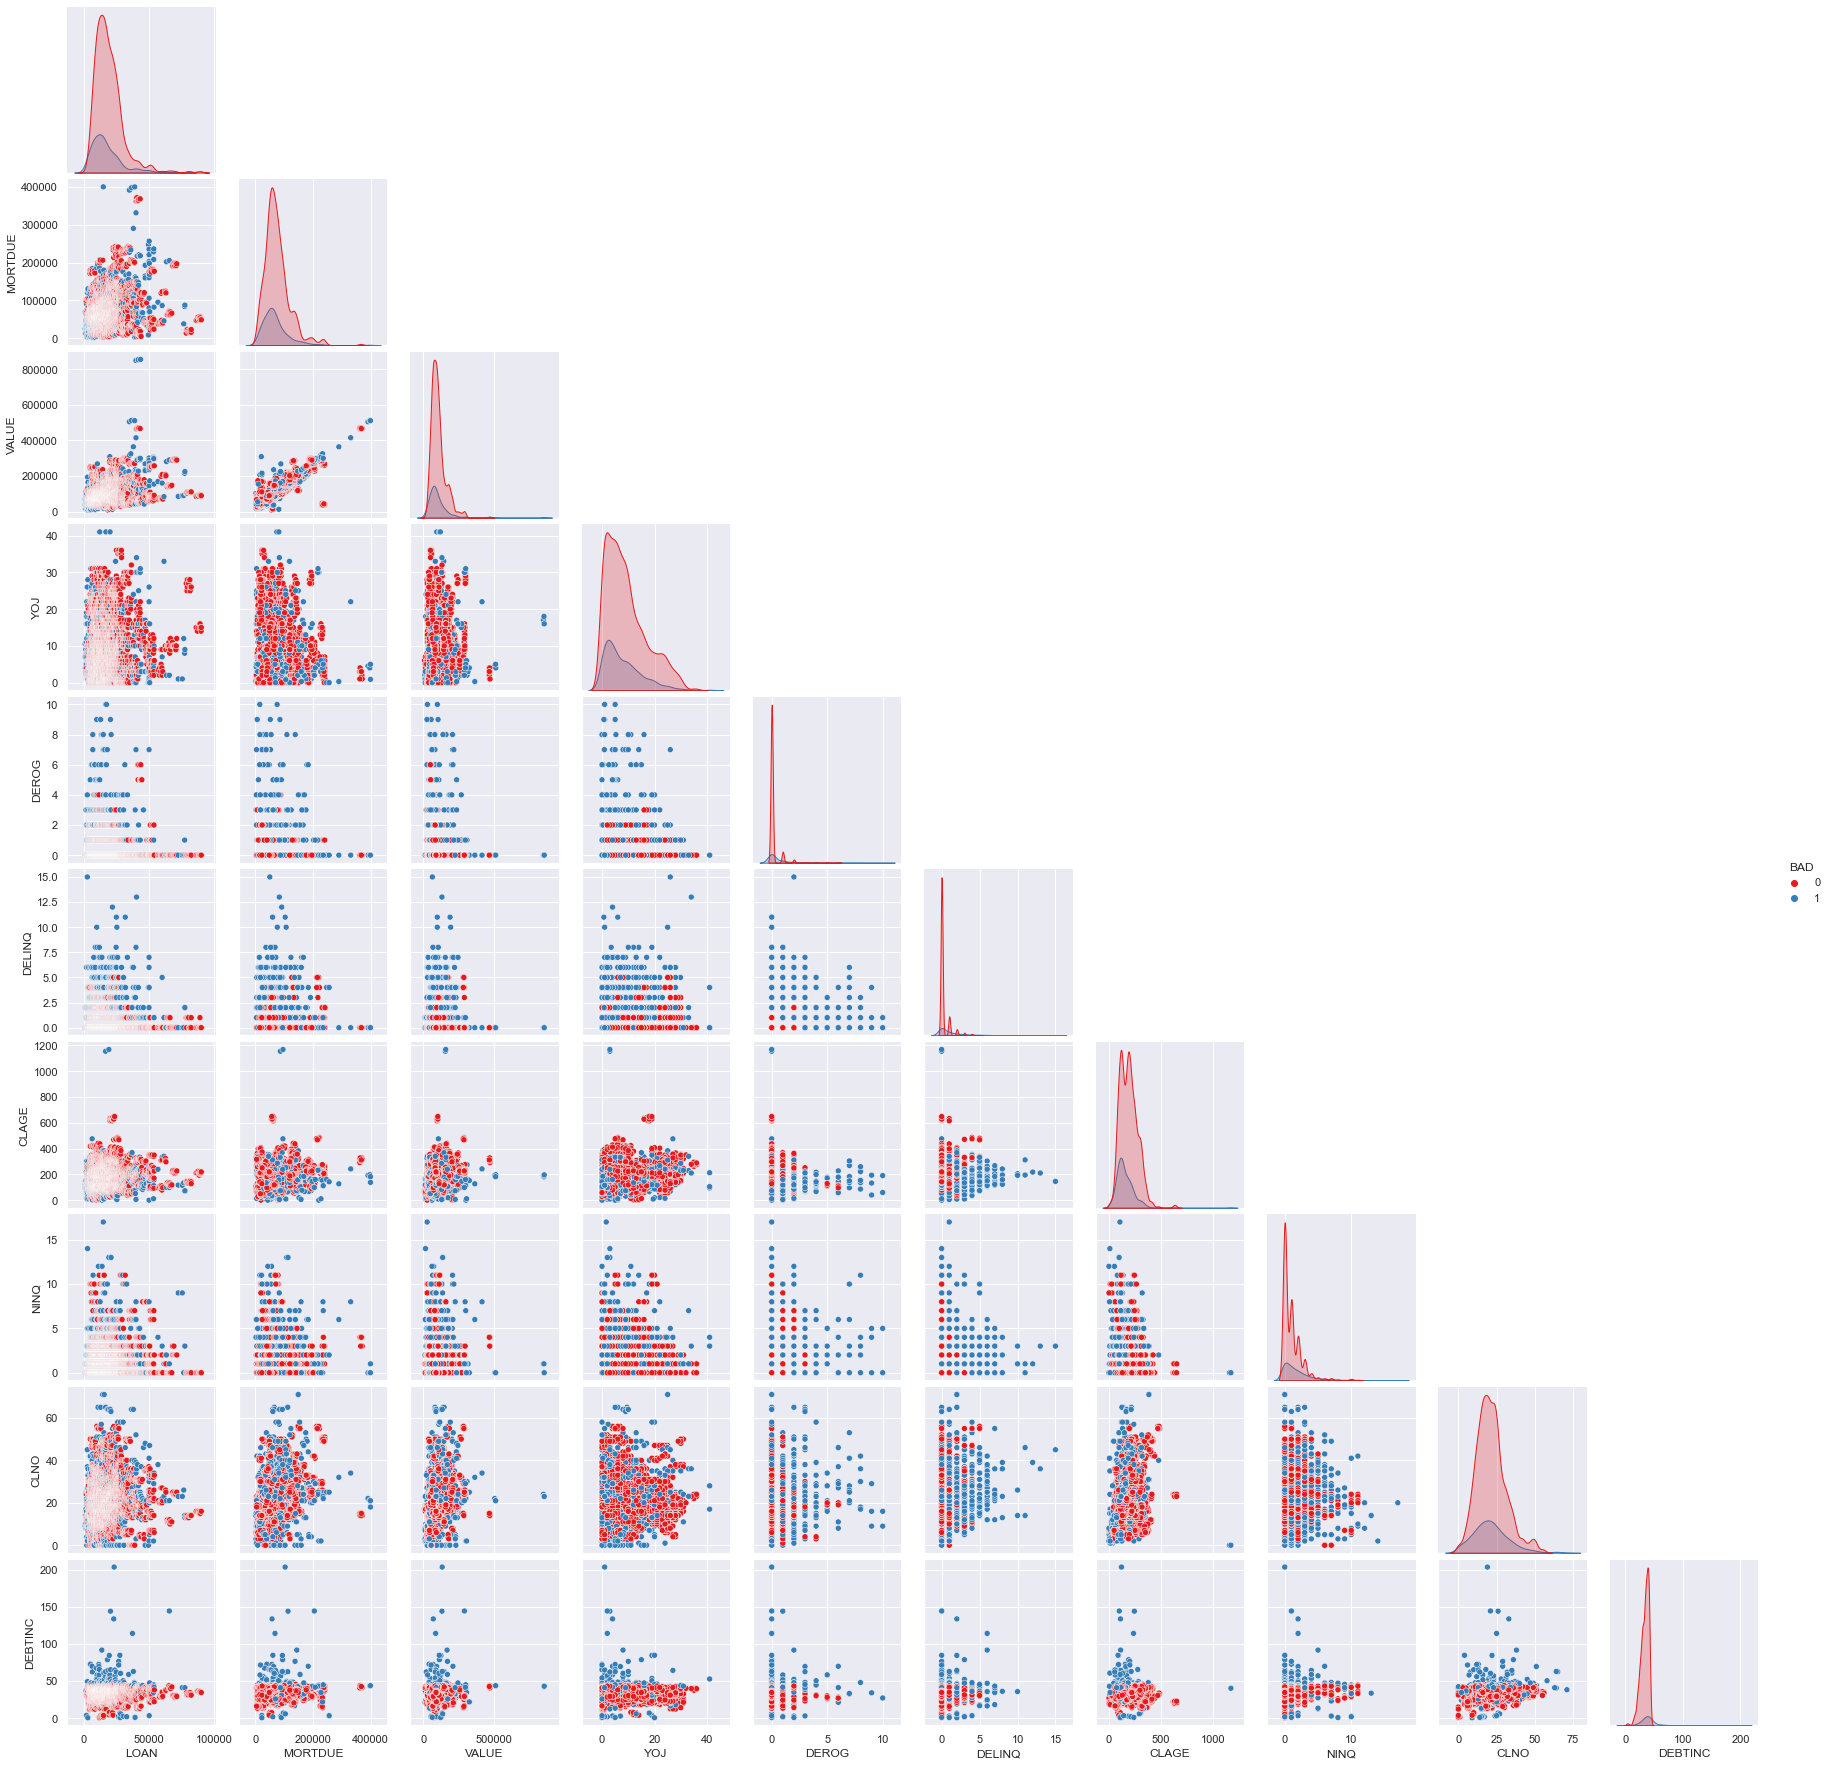

In [368]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code

sns.set_palette(sns.color_palette("Set1",10))
sns.pairplot(data, hue="BAD",corner=True)
plt.show()

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [370]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

for i in numerical_col:
    
    print(i)

LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [372]:
def outliners(col):
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    return low, high


for i in data.columns:
    if  data[column].dtype!= 'category':
        low, high = outliners(data[column])
        data[column] = np.where(data[column]>high|data[column]<low, np.nan, data[column]) 

In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.6 KB


#### Adding new columns in the dataset for each column which has missing values 

In [263]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
#def add_binary_flag(data,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    #new_col = str(col)
    #new_col += '_missing_values_flag'
    #data[new_col] = data[col].isna()
    #return data

In [264]:
# list of columns that has missing values in it
#missing_col = [col for col in data.columns if data[col].isnull().any()]

#for colmn in missing_col:
    #add_binary_flag(data,col)

In [293]:
data['DEBTINC'].fillna(data['DEBTINC'].median(), inplace=True)
data['DELINQ'].fillna(data['DELINQ'].median(), inplace=True)
data['MORTDUE'].fillna(data['MORTDUE'].median(), inplace=True)
data['YOJ'].fillna(data['YOJ'].median(), inplace=True)
data['NINQ'].fillna(data['NINQ'].median(), inplace=True)
data['CLAGE'].fillna(data['CLAGE'].median(), inplace=True)
data['VALUE'].fillna(data['VALUE'].median(), inplace=True)
data['JOB'].fillna(data['JOB'].mode(), inplace=True)
data['REASON'].fillna(data['REASON'].mode(), inplace=True)
data['CLNO'].fillna(data['CLNO'].median(), inplace=True)
data['REASON'].fillna(data['REASON'].mode()[0])
data['JOB']=data['JOB'].fillna(data['JOB'].mode()[0])
data['DEROG'].fillna(data['DEROG'].median(), inplace=True)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [102]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
#num_data = data.select_dtypes('number')

# Select string and object columns.
#cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
#data[num_data.columns] = num_data.median()[0]

# Fill object columns with model.
# Remove _________ and complete the code
#for column in cat_data:
    #mode = data[column].mode()[0]
    #data[column] = data[column].mode()[0]

In [294]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [295]:
data.to_csv("/Users/Xugao/Desktop/MIT_ADSP/elective_project/cleaned_data.csv",index=False)

In [299]:
df = pd.read_csv("/Users/Xugao/Desktop/MIT_ADSP/elective_project/cleaned_data.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
* Logistic Regression
* Decision Tree
* Random Forest
* XGboost

**2. Overall solution design** - What is the potential solution design?



**3. Measures of success** - What are the key measures of success?

